# Assignment 3 

### MACS 30000, Dr. Evans
### Dongcheng Yang  
### Oct. 18

In [4]:
# Import initial packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

### 2. Simulating your income

#### (a) Simulate 10,000 different realizations of lifetime income

In [8]:
def income_sim(p):
    """
    Requires a simulation profile, p, structured as a dictionary
  
    p = {
        'inc0'        : 80000,      #starting income
        'g'           : 0.025,      #growth rate
        'st_year'     : int(2020),  #start year
        'wk_years'    : 40,         #years to work
        'sigma'       : 0.13,       #standard deviation of income process
        'rho'         : 0.4,        #income persistence
        'num_draws'   : 10000       #simulations
    }
    """

    #set random seed
    np.random.seed(524)

    normal_errors = np.random.normal(0,p['sigma'], (p['wk_years'], p['num_draws']))

    #create a matrix of dim (wk_years, num_draws)
    ln_inc_mat = np.zeros((p['wk_years'], p['num_draws']))

    #fill the matrix
    ln_inc_mat[0, :] = np.log(p['inc0']) + normal_errors[0, :]

    #loop and apply model
    for yr in range(1, p['wk_years']):
        ln_inc_mat[yr, :] = (1-p['rho'])* ((np.log(p['inc0'])) + 
                            p['g']*yr) + p['rho'] * ln_inc_mat[yr - 1, :] + normal_errors[yr, :]    

    inc_mat = np.exp(ln_inc_mat) #dealing with large numbers so put in terms of 10k's
    return inc_mat
    

In [9]:
simulation_profile = {
    'inc0'        : 80000,      #starting income
    'g'           : 0.025,      #growth rate
    'st_year'     : int(2020),  #start year
    'wk_years'    : 40,         #years to work
    'sigma'       : 0.13,       #standard deviation of income process
    'rho'         : 0.4,        #income persistence
    'num_draws'   : 10000       #simulations
}

inc_mat = income_sim(simulation_profile)
print(inc_mat)

[[ 66409.15585396  98274.13534194 101939.81109509 ...  98720.39690442
   72404.51636886  68710.32820307]
 [ 80020.53020329  67383.19350738  84557.85626308 ...  68247.7770509
   74518.33613244  80555.96068584]
 [ 75805.26636606  66134.42494243  91458.20304692 ...  67268.53350159
   90012.42673528  80645.62355527]
 ...
 [272690.56519108 217821.73027242 184724.24512469 ... 159922.45424852
  253961.68337673 209741.55004062]
 [231539.17420799 202509.15149494 197955.96626493 ... 199502.43481758
  210951.71828579 205420.27946389]
 [197895.95201384 165115.10025278 172644.86927513 ... 248654.44847819
  234237.14656466 221566.29879732]]


Text(0,0.5,'Annual income (\\$s)')

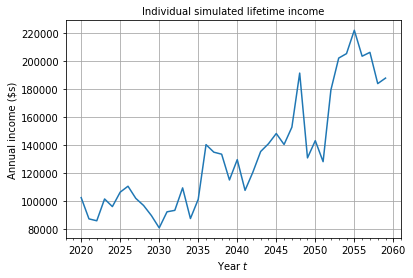

In [10]:
%matplotlib inline
p = simulation_profile
year_vec = np.arange(p['st_year'], p['st_year'] + p['wk_years'])
fig, ax = plt.subplots()
plt.plot(year_vec, inc_mat[:, 3])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated lifetime income', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual income (\$s)')

#### (b) Histogram with 50 bins of year t = 2020 initial income for each of the 10,000 simulations

percent of the class earn more than $100,000 in the first year out of the program:  0.0417
percent of the class earn less than $70,000 in the first year out of the program:  0.1512


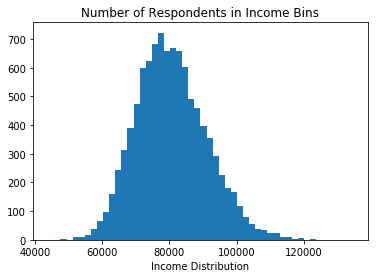

In [11]:
plt.hist(inc_mat[0,:], bins=50)
plt.xlabel("Income Distribution")
plt.title("Number of Respondents in Income Bins")
large = 0
small = 0
for i in inc_mat[0,:]:
    if i>100000:
        large+=1
    elif i<70000:
        small+=1
print("percent of the class earn more than $100,000 in the first year out of the program: ",large/10000)
print("percent of the class earn less than $70,000 in the first year out of the program: ",small/10000)

The plot above shows that the distribution is nearly normal.

#### (c) Years to pay off debt

percent of the simulations able to pay off the loan in 10 years:  0.1678


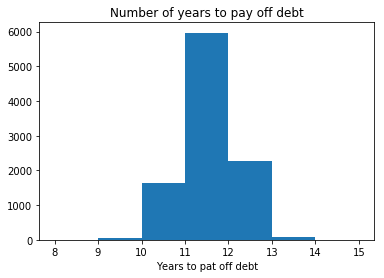

In [12]:
def year_to_pay_debt(inc_mat):
    year = []
    pay = 0
    y=0
    for i in range(p['num_draws']):
        for j in inc_mat[:,i]:
            pay+=j/10
            y+=1
            if pay>=95000:
                year.append(y)
                pay=0
                y=0
                break
    return year
yearlist = year_to_pay_debt(inc_mat)

plt.hist(yearlist, np.arange(min(yearlist)-1,max(yearlist)+3))
plt.xlabel("Years to pat off debt")
plt.title("Number of years to pay off debt")

year_less_than_ten = [i for i in yearlist if i<=10]
print("percent of the simulations able to pay off the loan in 10 years: ",len(year_less_than_ten)/p['num_draws'])

#### (d) After MACSS becomes well known

percent of the simulations able to pay off the loan in 10 years:  0.7602


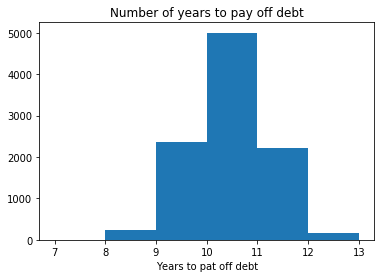

In [13]:
simulation_profile2 = {
    'inc0'        : 90000,      #starting income
    'g'           : 0.025,      #growth rate
    'st_year'     : int(2020),  #start year
    'wk_years'    : 40,         #years to work
    'sigma'       : 0.17,       #standard deviation of income process
    'rho'         : 0.4,        #income persistence
    'num_draws'   : 10000       #simulations
}

inc_mat2 = income_sim(simulation_profile2)

yearlist2 = year_to_pay_debt(inc_mat2)

plt.hist(yearlist2, np.arange(min(yearlist2),max(yearlist2)+1))
plt.xlabel("Years to pat off debt")
plt.title("Number of years to pay off debt")

year_less_than_ten2 = [i for i in yearlist2 if i<=10]
print("percent of the simulations able to pay off the loan in 10 years: ",len(year_less_than_ten2)/p['num_draws'])